# Task 2

In [85]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import sys

In [86]:
#np.random.seed(42)

#Genrating normally distributed random numbers by pseudorandom generator
#each class has 50 data points and class-labels are 0,1 and 2  
#toal features(dimensions) are 2
# each class is linearly-separable
class_0 = np.random.randn(50, 2) + np.array([0, -3]) # this class is centred around point (0,-3)
class_1 = np.random.randn(50, 2) + np.array([3, 3])  # this class is centred around point (3,3)
class_2 = np.random.randn(50, 2) + np.array([-3, 3]) # this class is centred around point (-3,3)


dataset = np.vstack([class_0,class_1,class_2]) #combining 50 data points of class 0, 50 data points of class 1,

#50 data points of class 2 in a vertical fashion or think like I have put it in a vertical stack

labels = np.array([0]*50 + [1]*50 + [2]*50) #assigning class-labels, initial 50 data-points as class 0,then 
#class-1 and then clas-2

vect = np.zeros((150, 3)) # creating a 150*3 size matrix 

for i in range(150):
    vect[i, labels[i]] = 1 #here, 150*3 matrix vect has 3 columns in which column-0 has values as 0 for those data
#points which don't have class-label as 0 and column-1 has values as 0 for those data
#points which don't have class-label as 1 and column-2 has values as 0 for those data
#points which don't have class-label as 2 

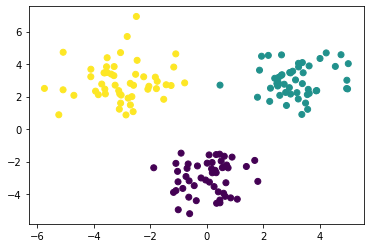

In [87]:
plt.scatter(dataset[:,0], dataset[:,1], c=labels)
plt.show() # it shows the linaerly-separable data points 

In [88]:
bias=1 #assuming bias as 1
data=[]
for i in range(150):
    temp=[]
    temp.append(bias)
    temp.append(dataset[i][0])
    temp.append(dataset[i][1])
    temp.append(labels[i])
    data.append(temp) # creating 150*4 size matrix in which fetarures are x0,x1,x2 where x0 is bias and x1,x2 
    # are features, last column represents the class-label
data #display the dataset    

[[1, -1.876552706041874, -2.380288554033864, 0],
 [1, -0.6353623888256293, -4.189666659090362, 0],
 [1, -0.6243453897132241, -3.1845253576558497, 0],
 [1, -0.6047446645382127, -5.20556605709907, 0],
 [1, 0.8970661968871322, -1.7251249587212778, 0],
 [1, 0.6515219913395057, -4.137685670424816, 0],
 [1, -0.20149153394751798, -3.006521315229458, 0],
 [1, 0.5987943895619102, -2.331659511281919, 0],
 [1, -0.7341737987784958, -2.9180044435864394, 0],
 [1, 0.4572804046152411, -1.5441776778532335, 0],
 [1, 0.7045065398247231, -2.2109433126244813, 0],
 [1, 0.08382662792936094, -1.5895408547964962, 0],
 [1, 0.4097627959594974, -3.8610879101735707, 0],
 [1, 1.4033699701251907, -2.3020967274609725, 0],
 [1, -0.4430440211284823, -3.4794929673992434, 0],
 [1, 0.2965755451407618, -2.5368152047324153, 0],
 [1, 0.19729226563120644, -2.688691326557115, 0],
 [1, 1.6999573745763805, -1.9284568477651143, 0],
 [1, 0.19063559126502433, -2.0586894192325165, 0],
 [1, -1.0325239035275395, -2.602072950053191, 0]

In [89]:
vect   #display the above created 150*3 matrix

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Estimating input weight vector for class 0

In [90]:
# For class 0

weights_0=[0.20,1.00,-1.00] # initializing weights

def predict(inputs,weights_0): # This function takes values of features (x0,x1,x2) 
    
    #one by one from dataset and weight vector as input and return the value according 
    #to the definition of standard sigmoid function  
    
    threshold = 0.0 # I have set the threshold as 0 
    v = 0.0
    for input,weight in zip(inputs,weights_0):
        v += input*weight
    return 1 if v >= threshold else 0.0    

def accuracy(matrix,weights_0): # This function gives the accuracy on the scale of 0 to 1 
    # in terms of how many points are correctly out of total number of data points   
    
    num_correct=0.0 #initialized total correct points as 0 
    preds=[]
    for i in range(len(matrix)):
        pred=predict(matrix[i][:-1],weights_0)
        preds.append(pred)
        if pred==vect[i][0]: num_correct += 1.0 #if data point is correctly classified then number of 
            #correctly classified points are added by 1
            
    print("Predictions:",preds)
    return num_correct/float(len(matrix))
    
def train_weights(matrix,weights_0,iterations=1000,l_rate=1.0): # This function is to train weights
    #According to perceptron convergence theorem, after number of iterations, maximum accuracy will be reached 
    # and after that weight vector will not be changed. Since, generated data is of random numbers.
    #So, each time when we run the cell, dataset will be different and so, number of iterations 
    #to get the estimated weight vector with accuracy 1.0 will be different and so accordingly you can change
    # the value of number of iterations.
    for epoch in range(iterations):
        cur_acc=accuracy(matrix,weights_0)
        print("\nIteration  %d \nWeights:  "%epoch,weights_0)
        print("Accuracy: ", cur_acc )
        if cur_acc==1.0 and True : break
            
        for i in range(len(matrix)):
            prediction = predict(matrix[i][:-1],weights_0)
            error = vect[i][0] - prediction #to get the difference between predicted and actual class-label
            
            if True:
                print("Training on data at index %d..."%i)
            for j in range(len(weights_0)):
                if True:
                    sys.stdout.write("\t Weight[%d]: %0.5f ---> "%(j,weights_0[j]))
                weights_0[j]= weights_0[j] + (l_rate*error*matrix[i][j]) # weight is modified 
                #according to the definition
                if True: sys.stdout.write("%0.5f\n"%weights_0[j])
    print("\n Final estimated weight vector with accuracy %0.5f is:"%cur_acc)
    return weights_0    

train_weights(data, weights_0=weights_0,iterations=1000,l_rate=1.0)

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.0, 1, 0.0, 1, 0.0, 0.0, 1, 1, 0.0, 0.0, 1, 0.0, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 1, 1, 0.0, 0.0, 1, 1, 1, 0.0, 1, 1, 0.0, 1, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 1, 0.0, 1, 1, 1, 1, 0.0, 1, 1, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Iteration  0 
Weights:   [0.2, 1.0, -1.0]
Accuracy:  0.8133333333333334
Training on data at index 0...
	 Weight[0]: 0.20000 ---> 0.20000
	 Weight[1]: 1.00000 ---> 1.00000
	 Weight[2]: -1.00000 ---> -1.00000
Training on data at index 1...
	 Weight[0]: 0.20000 ---> 0.20000
	 Weight[1]: 1.00000 ---> 1.00000
	 Weight[2]: -1.00000 ---> -1.00000
Training on data at index 2...
	 Weight[0]: 0.200

[-1.8, -0.9168061986116922, -6.247463212640529]

## Estimating input weight vector for class 1

In [91]:
# For class 1

weights_1=[0.20,1.00,-1.00] # initializing weights

def predict(inputs,weights_1): # This function takes values of features (x0,x1,x2) 
    
    #one by one from dataset and weight vector as input and return the value according 
    #to the definition of standard sigmoid function  
    
    threshold = 0.0 # I have set the threshold as 0 
    v = 0.0
    for input,weight in zip(inputs,weights_1):
        v += input*weight
    return 1 if v >= threshold else 0.0    

def accuracy(matrix,weights_1): # This function gives the accuracy on the scale of 0 to 1 
    # in terms of how many points are correctly out of total number of data points   
    
    num_correct=0.0 #initialized total correct points as 0 
    preds=[]
    for i in range(len(matrix)):
        pred=predict(matrix[i][:-1],weights_1)
        preds.append(pred)
        if pred==vect[i][1]: num_correct += 1.0 #if data point is correctly classified then number of 
            #correctly classified points are added by 1
            
    print("Predictions:",preds)
    return num_correct/float(len(matrix))
    
def train_weights(matrix,weights_1,iterations=1000,l_rate=1.0): # This function is to train weights
    #According to perceptron convergence theorem, after number of iterations, maximum accuracy will be reached 
    # and after that weight vector will not be changed. Since, generated data is of random numbers.
    #So, each time when we run the cell, dataset will be different and so, number of iterations 
    #to get the estimated weight vector with accuracy 1.0 will be different and so accordingly you can change
    # the value of number of iterations.
    for epoch in range(iterations):
        cur_acc=accuracy(matrix,weights_1)
        print("\nIteration  %d \nWeights:  "%epoch,weights_1)
        print("Accuracy: ", cur_acc )
        if cur_acc==1.0 and True : break
            
        for i in range(len(matrix)):
            prediction = predict(matrix[i][:-1],weights_1)
            error = vect[i][1] - prediction #to get the difference between predicted and actual class-label
            
            if True:
                print("Training on data at index %d..."%i)
            for j in range(len(weights_1)):
                if True:
                    sys.stdout.write("\t Weight[%d]: %0.5f ---> "%(j,weights_1[j]))
                weights_1[j]= weights_1[j] + (l_rate*error*matrix[i][j]) # weight is modified 
                #according to the definition
                if True: sys.stdout.write("%0.5f\n"%weights_1[j])
    print("\n Final estimated weight vector with accuracy %0.5f is:"%cur_acc)
    return weights_1

train_weights(data, weights_1=weights_1,iterations=1000,l_rate=1.0)

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.0, 1, 0.0, 1, 0.0, 0.0, 1, 1, 0.0, 0.0, 1, 0.0, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 1, 1, 0.0, 0.0, 1, 1, 1, 0.0, 1, 1, 0.0, 1, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 1, 0.0, 1, 1, 1, 1, 0.0, 1, 1, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Iteration  0 
Weights:   [0.2, 1.0, -1.0]
Accuracy:  0.52
Training on data at index 0...
	 Weight[0]: 0.20000 ---> -0.80000
	 Weight[1]: 1.00000 ---> 2.87655
	 Weight[2]: -1.00000 ---> 1.38029
Training on data at index 1...
	 Weight[0]: -0.80000 ---> -0.80000
	 Weight[1]: 2.87655 ---> 2.87655
	 Weight[2]: 1.38029 ---> 1.38029
Training on data at index 2...
	 Weight[0]: -0.80000 ---> -0.80

[-7.8, 3.7404825505086006, 2.4416631465715684]

## Estimating input weight vector for class 2

In [92]:
# For class 2

weights_2=[0.20,1.00,-1.00] # initializing weights

def predict(inputs,weights_2): # This function takes values of features (x0,x1,x2) 
    
    #one by one from dataset and weight vector as input and return the value according 
    #to the definition of standard sigmoid function  
    
    threshold = 0.0 # I have set the threshold as 0 
    v = 0.0
    for input,weight in zip(inputs,weights_2):
        v += input*weight
    return 1 if v >= threshold else 0.0    

def accuracy(matrix,weights_2): # This function gives the accuracy on the scale of 0 to 1 
    # in terms of how many points are correctly out of total number of data points   
    
    num_correct=0.0 #initialized total correct points as 0 
    preds=[]
    for i in range(len(matrix)):
        pred=predict(matrix[i][:-1],weights_2)
        preds.append(pred)
        if pred==vect[i][2]: num_correct += 1.0 #if data point is correctly classified then number of 
            #correctly classified points are added by 1
            
    print("Predictions:",preds)
    return num_correct/float(len(matrix))
    
def train_weights(matrix,weights_2,iterations=1000,l_rate=1.0): # This function is to train weights
    #According to perceptron convergence theorem, after number of iterations, maximum accuracy will be reached 
    # and after that weight vector will not be changed. Since, generated data is of random numbers.
    #So, each time when we run the cell, dataset will be different and so, number of iterations 
    #to get the estimated weight vector with accuracy 1.0 will be different and so accordingly you can change
    # the value of number of iterations.
    for epoch in range(iterations):
        cur_acc=accuracy(matrix,weights_2)
        print("\nIteration  %d \nWeights:  "%epoch,weights_2)
        print("Accuracy: ", cur_acc )
        if cur_acc==1.0 and True : break
            
        for i in range(len(matrix)):
            prediction = predict(matrix[i][:-1],weights_2)
            error = vect[i][2] - prediction #to get the difference between predicted and actual class-label
            
            if True:
                print("Training on data at index %d..."%i)
            for j in range(len(weights_2)):
                if True:
                    sys.stdout.write("\t Weight[%d]: %0.5f ---> "%(j,weights_2[j]))
                weights_2[j]= weights_2[j] + (l_rate*error*matrix[i][j]) # weight is modified 
                #according to the definition
                if True: sys.stdout.write("%0.5f\n"%weights_2[j])
    print("\n Final estimated weight vector with accuracy %0.5f is:"%cur_acc)
    return weights_2

train_weights(data, weights_2=weights_2,iterations=1000,l_rate=1.0)

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.0, 1, 0.0, 1, 0.0, 0.0, 1, 1, 0.0, 0.0, 1, 0.0, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 1, 1, 0.0, 0.0, 1, 1, 1, 0.0, 1, 1, 0.0, 1, 1, 0.0, 0.0, 0.0, 1, 1, 0.0, 1, 0.0, 1, 1, 1, 1, 0.0, 1, 1, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Iteration  0 
Weights:   [0.2, 1.0, -1.0]
Accuracy:  0.14666666666666667
Training on data at index 0...
	 Weight[0]: 0.20000 ---> -0.80000
	 Weight[1]: 1.00000 ---> 2.87655
	 Weight[2]: -1.00000 ---> 1.38029
Training on data at index 1...
	 Weight[0]: -0.80000 ---> -0.80000
	 Weight[1]: 2.87655 ---> 2.87655
	 Weight[2]: 1.38029 ---> 1.38029
Training on data at index 2...
	 Weight[0]: -0.8

[-4.8, -5.53343192602644, 2.418055225330352]